In [1]:
import torch
from torchvision import transforms, datasets

train_data = datasets.MNIST(
    '~/.pytorch/MNIST_data/',
    train=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])    
)

test_data = datasets.MNIST(
    '~/.pytorch/MNIST_data/',
    train=False,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])    
)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(iter(train_loader))

images.shape

torch.Size([64, 1, 28, 28])

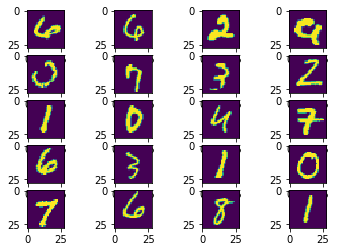

In [3]:
np_images = images.numpy()
fig = plt.figure()
for i in range(20):
    ax = fig.add_subplot(5, 4, i+1)
    ax.imshow(np.squeeze(np_images[i]))
    

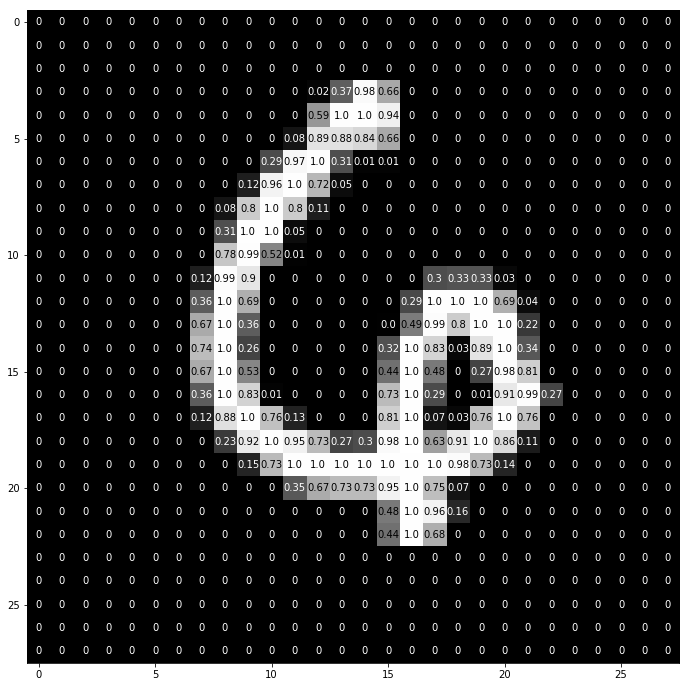

In [4]:
img = np.squeeze(np_images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [6]:
28*28

784

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = nn.Linear(784, 512)
        self.w2 = nn.Linear(512, 256)
        self.w3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.w1(x))
        x = self.dropout(x)
        x = F.relu(self.w2(x))
        x = self.dropout(x)
        return self.w3(x)
        
model = Net()        
print(model)
        
        
        
        

Net(
  (w1): Linear(in_features=784, out_features=512, bias=True)
  (w2): Linear(in_features=512, out_features=256, bias=True)
  (w3): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [10]:
epochs = 50

for e in range(epochs):
    train_loss = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.shape[0]
        
    train_loss = train_loss/len(train_loader.dataset)
    
    print('Epoch {} train loss {:.3f}'.format(e, train_loss))
        

Epoch 0 train loss 1.710
Epoch 1 train loss 0.604
Epoch 2 train loss 0.439
Epoch 3 train loss 0.376
Epoch 4 train loss 0.341
Epoch 5 train loss 0.312
Epoch 6 train loss 0.287
Epoch 7 train loss 0.266
Epoch 8 train loss 0.249
Epoch 9 train loss 0.232
Epoch 10 train loss 0.218
Epoch 11 train loss 0.205
Epoch 12 train loss 0.194
Epoch 13 train loss 0.183
Epoch 14 train loss 0.176
Epoch 15 train loss 0.166
Epoch 16 train loss 0.158
Epoch 17 train loss 0.151
Epoch 18 train loss 0.146
Epoch 19 train loss 0.140
Epoch 20 train loss 0.134
Epoch 21 train loss 0.129
Epoch 22 train loss 0.123
Epoch 23 train loss 0.120
Epoch 24 train loss 0.114
Epoch 25 train loss 0.112
Epoch 26 train loss 0.107
Epoch 27 train loss 0.104
Epoch 28 train loss 0.101
Epoch 29 train loss 0.096
Epoch 30 train loss 0.094
Epoch 31 train loss 0.091
Epoch 32 train loss 0.088
Epoch 33 train loss 0.087
Epoch 34 train loss 0.083
Epoch 35 train loss 0.081
Epoch 36 train loss 0.079
Epoch 37 train loss 0.078
Epoch 38 train loss 0.

In [25]:
np.set_printoptions(suppress=True)
with torch.no_grad():
    model.eval()
    
    images, labels = next(iter(test_loader))
    output = model(images)
    top_p, top_class = output.topk(1, dim=1)
    
    equals = top_class == labels.view(*top_class.shape)
    print(torch.mean(equals.type(torch.FloatTensor)))
    

tensor(0.9844)
